In [1]:
import firebase_admin
from firebase_admin import db
from datetime import datetime
import time
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cred_obj = firebase_admin.credentials.Certificate("Morphine2.json")
default_app = firebase_admin.initialize_app(cred_obj, {
  'databaseURL':'https://morphine-64cdd-default-rtdb.asia-southeast1.firebasedatabase.app/'
  })

In [46]:
ref_test1 = db.reference("/Test 1")
ref_test2 = db.reference("/Test 2")

In [4]:
# Keywords to extract for each set
keywords = ['Ax: ', 'Ay: ', 'Az: ', 'gx: ', 'gy: ', 'gz: ', 'temp: ', 'timing for this set: ']

# length of each keyword
length_keywords = [len(x) for x in keywords]

In [47]:
# create dataframe to store all the firebase readings
test1_df = pd.DataFrame(columns = ['accounter', 'LoopSpeedArr', 'UploadSpeedArr', 'aXarr', 'aYarr', 'aZarr', 'gXarr', 'gYarr', 'gZarr', 'tempArr', 'timeDifference'])

In [18]:
test2_df = pd.DataFrame(columns = ['accounter', 'LoopSpeedArr', 'UploadSpeedArr', 'index', 'Ax', 'Ay', 'Az', 'gx', 'gy', 'gz', 'temp', 'timingForThisSet', 'timeDifference'])

In [6]:
# function to extract every variable for one set
def process_set(output_set):
    indexes = [output_set.find(keyword) for keyword in keywords]
    df_row = []
    curr_data_index = int(output_set[:indexes[0]].strip())
    df_row.append(curr_data_index) # append in the index of the new input
    for i, index in enumerate(indexes):
        if i == len(indexes) - 1:
            x = output_set[index+length_keywords[i]:].strip() 
            df_row.append(x)
        else:
            x = output_set[index+length_keywords[i]: indexes[i+1]].strip()
            df_row.append(x)
    return df_row

# function to extract every variables for every data (with 20 sets) read in
def test2_process_esp32_output(esp32_output, timeDifference):
    global test2_df
    accounter = esp32_output['Accounter']
    LoopSpeedArr = esp32_output['LoopSpeedArr'][0]
    UploadSpeedArr = esp32_output['UploadSpeedArr'][0]
    datapoints = esp32_output['datapoints'][0]
    output_sets = datapoints.split('Set: ')[1:]
    for output_set in output_sets:
        datapoint = process_set(output_set)
        data = [accounter, LoopSpeedArr,UploadSpeedArr]
        data.extend(datapoint)
        data.append(timeDifference)
        new_df = pd.DataFrame([data], 
                              columns = ['accounter', 'LoopSpeedArr', 'UploadSpeedArr', 'index', 'Ax', 'Ay', 'Az', 'gx', 'gy', 'gz', 'temp', 'timingForThisSet', 'timeDifference'])
        test2_df = pd.concat([test2_df, new_df], ignore_index = True)
        
def test1_process_esp32_output(esp32_output, timeDifference):
    global test1_df
    accounter = esp32_output['Accounter']
    LoopSpeedArr = esp32_output['LoopSpeedArr'][0]
    UploadSpeedArr = esp32_output['UploadSpeedArr'][0]
    aXarr = esp32_output['aXarr'][0]
    aYarr = esp32_output['aYArr'][0]
    aZarr = esp32_output['aZArr'][0]
    gXarr = esp32_output['gXArr'][0]
    gYarr = esp32_output['gYArr'][0]
    gZarr = esp32_output['gZArr'][0]
    tempArr = esp32_output['tempArr'][0]
    
    data = [accounter, LoopSpeedArr, UploadSpeedArr, aXarr, aYarr, aZarr, gXarr, gYarr, gZarr, tempArr, timeDifference]
    new_df = pd.DataFrame([data], columns = ['accounter', 'LoopSpeedArr', 'UploadSpeedArr', 'aXarr', 'aYarr', 'aZarr', 'gXarr', 'gYarr', 'gZarr', 'tempArr', 'timeDifference'])
    test1_df = pd.concat([test1_df, new_df], ignore_index = True)

In [12]:
# Test 1
curr_accounter = ref_test1.get()['Accounter']
curr_time = time.time()
test_1_summary_stats = []
while True:
    new_accounter = ref_test1.get()['Accounter']
    # print(new_accounter, curr_accounter)
    if new_accounter != curr_accounter:
        end_time = time.time()
        test1_process_esp32_output(ref_test1.get(), end_time - curr_time)
        test_1_summary_stats.append(end_time - curr_time)
        print(f"curr_accounter: {curr_accounter}, new_accounter: {new_accounter}, time taken: {end_time - curr_time}")
        curr_accounter = new_accounter
        curr_time = end_time

curr_accounter: 179, new_accounter: 180, time taken: 0.9426636695861816
curr_accounter: 180, new_accounter: 181, time taken: 0.5450506210327148
curr_accounter: 181, new_accounter: 182, time taken: 0.5194966793060303
curr_accounter: 182, new_accounter: 183, time taken: 0.5277304649353027
curr_accounter: 183, new_accounter: 184, time taken: 0.5652670860290527
curr_accounter: 184, new_accounter: 185, time taken: 0.5260951519012451
curr_accounter: 185, new_accounter: 186, time taken: 0.5224220752716064
curr_accounter: 186, new_accounter: 187, time taken: 0.529198408126831
curr_accounter: 187, new_accounter: 188, time taken: 0.5723066329956055
curr_accounter: 188, new_accounter: 189, time taken: 0.5012598037719727
curr_accounter: 189, new_accounter: 190, time taken: 1.2946205139160156
curr_accounter: 190, new_accounter: 191, time taken: 0.5577890872955322
curr_accounter: 191, new_accounter: 192, time taken: 0.5017101764678955
curr_accounter: 192, new_accounter: 193, time taken: 0.5320358276

curr_accounter: 293, new_accounter: 294, time taken: 0.505324125289917
curr_accounter: 294, new_accounter: 295, time taken: 0.5471498966217041
curr_accounter: 295, new_accounter: 296, time taken: 0.5652673244476318
curr_accounter: 296, new_accounter: 297, time taken: 0.5601143836975098
curr_accounter: 297, new_accounter: 298, time taken: 0.517570972442627
curr_accounter: 298, new_accounter: 299, time taken: 0.4953162670135498
curr_accounter: 299, new_accounter: 300, time taken: 1.3393840789794922
curr_accounter: 300, new_accounter: 301, time taken: 0.5112271308898926
curr_accounter: 301, new_accounter: 302, time taken: 0.5135846138000488
curr_accounter: 302, new_accounter: 303, time taken: 0.5504138469696045
curr_accounter: 303, new_accounter: 304, time taken: 0.5310420989990234
curr_accounter: 304, new_accounter: 305, time taken: 0.5382161140441895
curr_accounter: 305, new_accounter: 306, time taken: 0.5001757144927979
curr_accounter: 306, new_accounter: 307, time taken: 0.52613782882

curr_accounter: 407, new_accounter: 408, time taken: 0.5104997158050537
curr_accounter: 408, new_accounter: 409, time taken: 0.5097639560699463
curr_accounter: 409, new_accounter: 410, time taken: 1.1446642875671387
curr_accounter: 410, new_accounter: 411, time taken: 0.5120482444763184
curr_accounter: 411, new_accounter: 412, time taken: 0.569695234298706
curr_accounter: 412, new_accounter: 413, time taken: 0.545008659362793
curr_accounter: 413, new_accounter: 414, time taken: 0.5954773426055908
curr_accounter: 414, new_accounter: 415, time taken: 0.5256118774414062
curr_accounter: 415, new_accounter: 416, time taken: 0.5146512985229492
curr_accounter: 416, new_accounter: 417, time taken: 0.549072265625
curr_accounter: 417, new_accounter: 418, time taken: 0.563185453414917
curr_accounter: 418, new_accounter: 419, time taken: 0.5396463871002197
curr_accounter: 419, new_accounter: 420, time taken: 1.1999189853668213
curr_accounter: 420, new_accounter: 421, time taken: 0.5092170238494873

curr_accounter: 522, new_accounter: 523, time taken: 0.7660815715789795
curr_accounter: 523, new_accounter: 524, time taken: 0.5654973983764648
curr_accounter: 524, new_accounter: 525, time taken: 0.5485749244689941
curr_accounter: 525, new_accounter: 526, time taken: 0.5015361309051514
curr_accounter: 526, new_accounter: 527, time taken: 0.5654563903808594
curr_accounter: 527, new_accounter: 528, time taken: 0.5166647434234619
curr_accounter: 528, new_accounter: 529, time taken: 0.5161383152008057
curr_accounter: 529, new_accounter: 530, time taken: 1.1745531558990479
curr_accounter: 530, new_accounter: 531, time taken: 0.5119335651397705
curr_accounter: 531, new_accounter: 532, time taken: 0.5212335586547852
curr_accounter: 532, new_accounter: 533, time taken: 0.5778758525848389
curr_accounter: 533, new_accounter: 534, time taken: 0.6465959548950195
curr_accounter: 534, new_accounter: 535, time taken: 0.4573829174041748
curr_accounter: 535, new_accounter: 536, time taken: 0.522904396

curr_accounter: 636, new_accounter: 637, time taken: 0.5864100456237793
curr_accounter: 637, new_accounter: 638, time taken: 0.5440733432769775
curr_accounter: 638, new_accounter: 639, time taken: 0.4902181625366211
curr_accounter: 639, new_accounter: 640, time taken: 1.1333940029144287
curr_accounter: 640, new_accounter: 641, time taken: 0.553779125213623
curr_accounter: 641, new_accounter: 642, time taken: 1.1559152603149414
curr_accounter: 642, new_accounter: 643, time taken: 0.5774681568145752
curr_accounter: 643, new_accounter: 644, time taken: 0.525780439376831
curr_accounter: 644, new_accounter: 645, time taken: 0.5473217964172363
curr_accounter: 645, new_accounter: 646, time taken: 0.5103881359100342
curr_accounter: 646, new_accounter: 647, time taken: 0.5477540493011475
curr_accounter: 647, new_accounter: 648, time taken: 0.51841139793396
curr_accounter: 648, new_accounter: 649, time taken: 0.5525104999542236
curr_accounter: 649, new_accounter: 650, time taken: 1.1178390979766

curr_accounter: 751, new_accounter: 752, time taken: 0.47461724281311035
curr_accounter: 752, new_accounter: 753, time taken: 0.7923147678375244
curr_accounter: 753, new_accounter: 754, time taken: 0.5020692348480225
curr_accounter: 754, new_accounter: 755, time taken: 2.2350940704345703
curr_accounter: 755, new_accounter: 756, time taken: 0.47350192070007324
curr_accounter: 756, new_accounter: 757, time taken: 0.4989197254180908
curr_accounter: 757, new_accounter: 758, time taken: 0.5129573345184326
curr_accounter: 758, new_accounter: 759, time taken: 0.50384521484375
curr_accounter: 759, new_accounter: 760, time taken: 0.5697212219238281
curr_accounter: 760, new_accounter: 761, time taken: 2.0607643127441406
curr_accounter: 761, new_accounter: 762, time taken: 0.4372835159301758
curr_accounter: 762, new_accounter: 763, time taken: 0.48125362396240234
curr_accounter: 763, new_accounter: 764, time taken: 0.5854334831237793
curr_accounter: 764, new_accounter: 765, time taken: 0.50862050

curr_accounter: 865, new_accounter: 866, time taken: 0.574246883392334
curr_accounter: 866, new_accounter: 867, time taken: 0.441115140914917
curr_accounter: 867, new_accounter: 868, time taken: 0.573725700378418
curr_accounter: 868, new_accounter: 869, time taken: 0.49520373344421387
curr_accounter: 869, new_accounter: 870, time taken: 0.446216344833374
curr_accounter: 870, new_accounter: 871, time taken: 2.3250913619995117
curr_accounter: 871, new_accounter: 872, time taken: 0.5131957530975342
curr_accounter: 872, new_accounter: 873, time taken: 0.525111198425293
curr_accounter: 873, new_accounter: 874, time taken: 0.587669849395752
curr_accounter: 874, new_accounter: 875, time taken: 0.7138557434082031
curr_accounter: 875, new_accounter: 876, time taken: 0.9105710983276367
curr_accounter: 876, new_accounter: 877, time taken: 0.6033692359924316
curr_accounter: 877, new_accounter: 878, time taken: 0.6944501399993896
curr_accounter: 878, new_accounter: 879, time taken: 0.65986537933349

curr_accounter: 979, new_accounter: 980, time taken: 1.1611828804016113
curr_accounter: 980, new_accounter: 981, time taken: 0.5237700939178467
curr_accounter: 981, new_accounter: 982, time taken: 0.524777889251709
curr_accounter: 982, new_accounter: 983, time taken: 0.5303454399108887
curr_accounter: 983, new_accounter: 984, time taken: 0.5597109794616699
curr_accounter: 984, new_accounter: 985, time taken: 0.6175415515899658
curr_accounter: 985, new_accounter: 986, time taken: 0.5777442455291748
curr_accounter: 986, new_accounter: 987, time taken: 0.6867458820343018
curr_accounter: 987, new_accounter: 988, time taken: 0.8240640163421631
curr_accounter: 988, new_accounter: 989, time taken: 0.5050172805786133
curr_accounter: 989, new_accounter: 990, time taken: 4.033186435699463
curr_accounter: 990, new_accounter: 991, time taken: 1.1657605171203613
curr_accounter: 991, new_accounter: 992, time taken: 0.7473881244659424
curr_accounter: 992, new_accounter: 993, time taken: 1.14109921455

curr_accounter: 1091, new_accounter: 1092, time taken: 0.4925675392150879
curr_accounter: 1092, new_accounter: 1093, time taken: 0.5225780010223389
curr_accounter: 1093, new_accounter: 1094, time taken: 0.7746315002441406
curr_accounter: 1094, new_accounter: 1095, time taken: 0.5532186031341553
curr_accounter: 1095, new_accounter: 1096, time taken: 0.4963533878326416
curr_accounter: 1096, new_accounter: 1097, time taken: 0.5025970935821533
curr_accounter: 1097, new_accounter: 1098, time taken: 0.519911527633667
curr_accounter: 1098, new_accounter: 1099, time taken: 0.5790247917175293
curr_accounter: 1099, new_accounter: 1100, time taken: 1.1918423175811768
curr_accounter: 1100, new_accounter: 1101, time taken: 0.5409030914306641
curr_accounter: 1101, new_accounter: 1102, time taken: 0.5117795467376709
curr_accounter: 1102, new_accounter: 1103, time taken: 0.5148992538452148
curr_accounter: 1103, new_accounter: 1104, time taken: 1.0382111072540283
curr_accounter: 1104, new_accounter: 11

curr_accounter: 1202, new_accounter: 1203, time taken: 0.5861270427703857
curr_accounter: 1203, new_accounter: 1204, time taken: 0.5285751819610596
curr_accounter: 1204, new_accounter: 1205, time taken: 0.578986644744873
curr_accounter: 1205, new_accounter: 1206, time taken: 0.6000323295593262
curr_accounter: 1206, new_accounter: 1207, time taken: 0.7121069431304932
curr_accounter: 1207, new_accounter: 1208, time taken: 0.6442022323608398
curr_accounter: 1208, new_accounter: 1209, time taken: 0.5705757141113281
curr_accounter: 1209, new_accounter: 1210, time taken: 1.3874194622039795
curr_accounter: 1210, new_accounter: 1211, time taken: 0.5205240249633789
curr_accounter: 1211, new_accounter: 1212, time taken: 0.582554817199707
curr_accounter: 1212, new_accounter: 1213, time taken: 0.5452795028686523
curr_accounter: 1213, new_accounter: 1214, time taken: 1.367126703262329
curr_accounter: 1214, new_accounter: 1215, time taken: 0.577782392501831
curr_accounter: 1215, new_accounter: 1216,

KeyboardInterrupt: 

In [48]:
# Test 2
curr_accounter = ref_test2.get()['Accounter']
curr_time = time.time()
test_2_summary_stats = []
while True:
    new_accounter = ref_test2.get()['Accounter']
    if new_accounter != curr_accounter:
        end_time = time.time()
        test2_process_esp32_output(ref_test2.get(), end_time - curr_time)
        test_2_summary_stats.append(end_time - curr_time)
        print(f"curr_accounter: {curr_accounter}, new_accounter: {new_accounter}, time taken: {end_time - curr_time}")
        curr_accounter = new_accounter
        curr_time = end_time

curr_accounter: 324, new_accounter: 325, time taken: 0.7745654582977295
curr_accounter: 325, new_accounter: 326, time taken: 0.2797515392303467
curr_accounter: 326, new_accounter: 327, time taken: 0.26512694358825684
curr_accounter: 327, new_accounter: 328, time taken: 0.3300905227661133
curr_accounter: 328, new_accounter: 329, time taken: 0.29350805282592773
curr_accounter: 329, new_accounter: 330, time taken: 0.3454008102416992
curr_accounter: 330, new_accounter: 331, time taken: 0.5926005840301514
curr_accounter: 331, new_accounter: 332, time taken: 0.3061206340789795
curr_accounter: 332, new_accounter: 333, time taken: 0.29195475578308105
curr_accounter: 333, new_accounter: 334, time taken: 0.3122892379760742
curr_accounter: 334, new_accounter: 335, time taken: 0.3652932643890381
curr_accounter: 335, new_accounter: 336, time taken: 0.2248845100402832
curr_accounter: 336, new_accounter: 337, time taken: 0.30702710151672363
curr_accounter: 337, new_accounter: 338, time taken: 0.50508

curr_accounter: 438, new_accounter: 439, time taken: 0.3110377788543701
curr_accounter: 439, new_accounter: 440, time taken: 0.28087759017944336
curr_accounter: 440, new_accounter: 441, time taken: 0.29418230056762695
curr_accounter: 441, new_accounter: 442, time taken: 0.2886929512023926
curr_accounter: 442, new_accounter: 443, time taken: 0.30836915969848633
curr_accounter: 443, new_accounter: 444, time taken: 0.5310916900634766
curr_accounter: 444, new_accounter: 445, time taken: 0.503171443939209
curr_accounter: 445, new_accounter: 446, time taken: 0.6273126602172852
curr_accounter: 446, new_accounter: 447, time taken: 0.26683878898620605
curr_accounter: 447, new_accounter: 448, time taken: 0.31421852111816406
curr_accounter: 448, new_accounter: 449, time taken: 0.2888069152832031
curr_accounter: 449, new_accounter: 450, time taken: 0.9855196475982666
curr_accounter: 450, new_accounter: 451, time taken: 0.3069779872894287
curr_accounter: 451, new_accounter: 452, time taken: 0.29726

curr_accounter: 552, new_accounter: 553, time taken: 0.5686361789703369
curr_accounter: 553, new_accounter: 554, time taken: 0.25120067596435547
curr_accounter: 554, new_accounter: 555, time taken: 0.32037830352783203
curr_accounter: 555, new_accounter: 556, time taken: 0.271953821182251
curr_accounter: 556, new_accounter: 557, time taken: 0.31623029708862305
curr_accounter: 557, new_accounter: 558, time taken: 0.26146817207336426
curr_accounter: 558, new_accounter: 559, time taken: 0.25659608840942383
curr_accounter: 559, new_accounter: 560, time taken: 0.29712629318237305
curr_accounter: 560, new_accounter: 561, time taken: 0.4066126346588135
curr_accounter: 561, new_accounter: 562, time taken: 1.1309545040130615
curr_accounter: 562, new_accounter: 563, time taken: 0.26555514335632324
curr_accounter: 563, new_accounter: 564, time taken: 0.2776651382446289
curr_accounter: 564, new_accounter: 565, time taken: 0.31816816329956055
curr_accounter: 565, new_accounter: 566, time taken: 0.32

curr_accounter: 666, new_accounter: 667, time taken: 0.31765151023864746
curr_accounter: 667, new_accounter: 668, time taken: 0.26564455032348633
curr_accounter: 668, new_accounter: 669, time taken: 0.2853124141693115
curr_accounter: 669, new_accounter: 670, time taken: 0.27091383934020996
curr_accounter: 670, new_accounter: 671, time taken: 0.2681090831756592
curr_accounter: 671, new_accounter: 672, time taken: 0.2919480800628662
curr_accounter: 672, new_accounter: 673, time taken: 0.2857699394226074
curr_accounter: 673, new_accounter: 674, time taken: 0.316835880279541
curr_accounter: 674, new_accounter: 675, time taken: 0.29891300201416016
curr_accounter: 675, new_accounter: 676, time taken: 0.28661060333251953
curr_accounter: 676, new_accounter: 677, time taken: 0.29950809478759766
curr_accounter: 677, new_accounter: 678, time taken: 0.3053109645843506
curr_accounter: 678, new_accounter: 679, time taken: 0.28893280029296875
curr_accounter: 679, new_accounter: 680, time taken: 0.281

curr_accounter: 781, new_accounter: 782, time taken: 0.26084351539611816
curr_accounter: 782, new_accounter: 783, time taken: 0.26881837844848633
curr_accounter: 783, new_accounter: 784, time taken: 0.2532792091369629
curr_accounter: 784, new_accounter: 785, time taken: 0.26771020889282227
curr_accounter: 785, new_accounter: 786, time taken: 0.27070021629333496
curr_accounter: 786, new_accounter: 787, time taken: 0.8881669044494629
curr_accounter: 787, new_accounter: 788, time taken: 0.2502315044403076
curr_accounter: 788, new_accounter: 789, time taken: 0.28119897842407227
curr_accounter: 789, new_accounter: 790, time taken: 0.31977081298828125
curr_accounter: 790, new_accounter: 791, time taken: 0.24419403076171875
curr_accounter: 791, new_accounter: 792, time taken: 0.25438928604125977
curr_accounter: 792, new_accounter: 793, time taken: 0.30214691162109375
curr_accounter: 793, new_accounter: 794, time taken: 0.28119874000549316
curr_accounter: 794, new_accounter: 795, time taken: 0

curr_accounter: 895, new_accounter: 896, time taken: 0.2960982322692871
curr_accounter: 896, new_accounter: 897, time taken: 0.37099218368530273
curr_accounter: 897, new_accounter: 898, time taken: 0.2977786064147949
curr_accounter: 898, new_accounter: 899, time taken: 0.2913780212402344
curr_accounter: 899, new_accounter: 900, time taken: 0.2775094509124756
curr_accounter: 900, new_accounter: 901, time taken: 0.29685068130493164
curr_accounter: 901, new_accounter: 902, time taken: 0.2938387393951416
curr_accounter: 902, new_accounter: 903, time taken: 0.2961399555206299
curr_accounter: 903, new_accounter: 904, time taken: 0.33008694648742676
curr_accounter: 904, new_accounter: 905, time taken: 0.29735708236694336
curr_accounter: 905, new_accounter: 906, time taken: 0.28218913078308105
curr_accounter: 906, new_accounter: 907, time taken: 0.2943120002746582
curr_accounter: 907, new_accounter: 908, time taken: 0.2898285388946533
curr_accounter: 908, new_accounter: 909, time taken: 0.2903

curr_accounter: 1018, new_accounter: 1019, time taken: 0.3307340145111084
curr_accounter: 1019, new_accounter: 1020, time taken: 0.33056116104125977
curr_accounter: 1020, new_accounter: 1021, time taken: 0.3316071033477783
curr_accounter: 1021, new_accounter: 1022, time taken: 0.3215525150299072
curr_accounter: 1022, new_accounter: 1023, time taken: 0.3507678508758545
curr_accounter: 1023, new_accounter: 1025, time taken: 0.33636927604675293
curr_accounter: 1025, new_accounter: 1026, time taken: 0.41935157775878906
curr_accounter: 1026, new_accounter: 1027, time taken: 0.32645750045776367
curr_accounter: 1027, new_accounter: 1028, time taken: 0.3224163055419922
curr_accounter: 1028, new_accounter: 1030, time taken: 0.3303534984588623
curr_accounter: 1030, new_accounter: 1031, time taken: 0.3341703414916992
curr_accounter: 1031, new_accounter: 1032, time taken: 0.33236050605773926
curr_accounter: 1032, new_accounter: 1033, time taken: 0.4606354236602783
curr_accounter: 1033, new_account

curr_accounter: 1148, new_accounter: 1150, time taken: 0.3644535541534424
curr_accounter: 1150, new_accounter: 1151, time taken: 0.37299370765686035
curr_accounter: 1151, new_accounter: 1152, time taken: 0.37804174423217773
curr_accounter: 1152, new_accounter: 1154, time taken: 0.3655407428741455
curr_accounter: 1154, new_accounter: 1155, time taken: 0.3675718307495117
curr_accounter: 1155, new_accounter: 1156, time taken: 0.36459970474243164
curr_accounter: 1156, new_accounter: 1158, time taken: 0.36358118057250977
curr_accounter: 1158, new_accounter: 1159, time taken: 0.3674929141998291
curr_accounter: 1159, new_accounter: 1160, time taken: 0.3613145351409912
curr_accounter: 1160, new_accounter: 1162, time taken: 0.372683048248291
curr_accounter: 1162, new_accounter: 1163, time taken: 0.3662261962890625
curr_accounter: 1163, new_accounter: 1164, time taken: 0.36445164680480957
curr_accounter: 1164, new_accounter: 1165, time taken: 0.4046318531036377
curr_accounter: 1165, new_accounte

curr_accounter: 1297, new_accounter: 1299, time taken: 0.42144155502319336
curr_accounter: 1299, new_accounter: 1301, time taken: 0.41436052322387695
curr_accounter: 1301, new_accounter: 1302, time taken: 0.4080383777618408
curr_accounter: 1302, new_accounter: 1304, time taken: 0.39989399909973145
curr_accounter: 1304, new_accounter: 1305, time taken: 0.4250822067260742
curr_accounter: 1305, new_accounter: 1307, time taken: 0.4234461784362793
curr_accounter: 1307, new_accounter: 1308, time taken: 0.4175701141357422
curr_accounter: 1308, new_accounter: 1310, time taken: 0.42692041397094727
curr_accounter: 1310, new_accounter: 1311, time taken: 0.4131338596343994
curr_accounter: 1311, new_accounter: 1313, time taken: 0.43550825119018555
curr_accounter: 1313, new_accounter: 1315, time taken: 0.4140346050262451
curr_accounter: 1315, new_accounter: 1316, time taken: 0.4203057289123535
curr_accounter: 1316, new_accounter: 1318, time taken: 0.41936159133911133
curr_accounter: 1318, new_accoun

KeyboardInterrupt: 

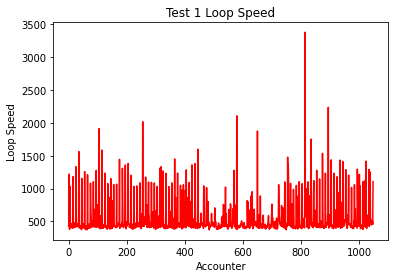

In [60]:
test_1_loop_speed = np.array(test1_df['LoopSpeedArr'])
test_1_x = np.arange(0, len(test_1_loop_speed))
plt.plot(test_1_x, test_1_loop_speed, color ="red")
plt.xlabel("Accounter")
plt.ylabel("Loop Speed")
plt.title("Test 1 Loop Speed")
plt.show()

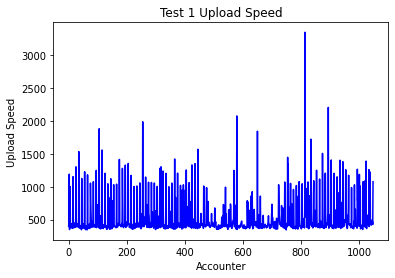

In [59]:
test_1_upload_speed = np.array(test1_df['UploadSpeedArr'])
test_1_x = np.arange(0, len(test_1_upload_speed))
plt.plot(test_1_x, test_1_upload_speed, color ="blue")
plt.xlabel("Accounter")
plt.ylabel("Upload Speed")
plt.title("Test 1 Upload Speed")
plt.show()

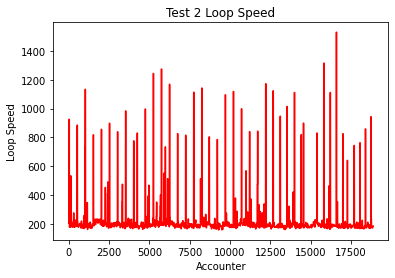

In [57]:
test_2_loop_speed = np.array(test2_df['LoopSpeedArr'])
test_2_x = np.arange(0, len(test_2_loop_speed))
plt.plot(test_2_x, test_2_loop_speed, color ="red")
plt.xlabel("Accounter")
plt.ylabel("Loop Speed")
plt.title("Test 2 Loop Speed")
plt.show()

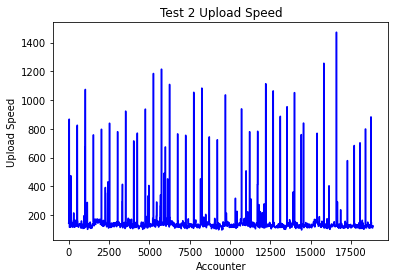

In [61]:
test_2_upload_speed = np.array(test2_df['UploadSpeedArr'])
test_2_x = np.arange(0, len(test_2_upload_speed))
plt.plot(test_2_x, test_2_upload_speed, color ="blue")
plt.xlabel("Accounter")
plt.ylabel("Upload Speed")
plt.title("Test 2 Upload Speed")
plt.show()

In [52]:
np.savetxt("test_1_loop_speed.txt", test_1_loop_speed)
np.savetxt("test_1_upload_speed.txt", test_1_upload_speed)

In [55]:
np.savetxt("test_2_loop_speed.txt", test_2_loop_speed)
np.savetxt("test_2_upload_speed.txt", test_2_upload_speed)